<a href="https://colab.research.google.com/github/VRAJPATEL81/corner_detection_distance/blob/main/PaperCoin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter image path: img10.jpeg


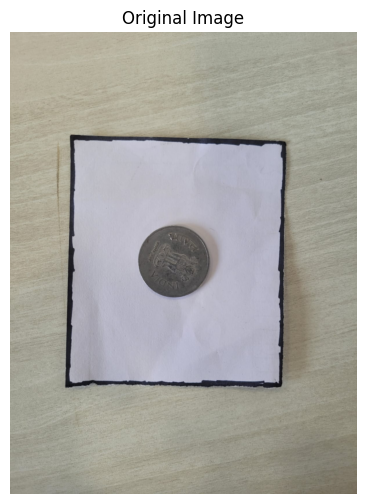

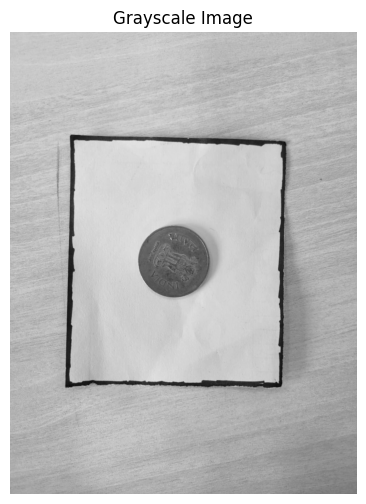

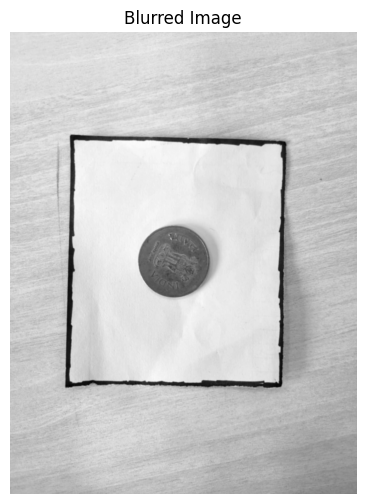

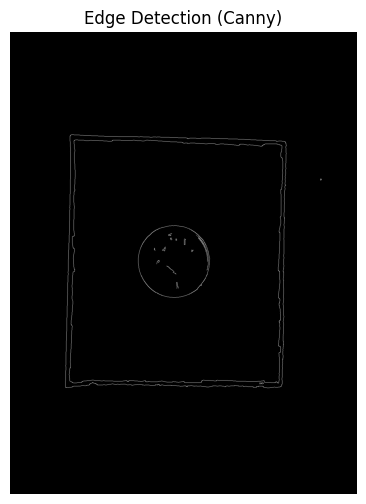

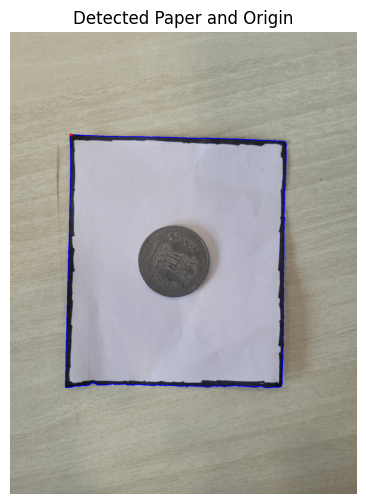

Coin 1: Center=(551, 835), Distance from Origin=587.98 pixels
Coin 2: Center=(579, 757), Distance from Origin=544.94 pixels
Coin 3: Center=(632, 757), Distance from Origin=582.14 pixels
Coin 4: Center=(571, 791), Distance from Origin=565.28 pixels
Coin 5: Center=(524, 856), Distance from Origin=590.42 pixels
Coin 6: Center=(608, 861), Distance from Origin=642.98 pixels
Coin 7: Center=(531, 790), Distance from Origin=539.81 pixels
Coin 8: Center=(604, 778), Distance from Origin=577.34 pixels
Coin 9: Center=(643, 787), Distance from Origin=610.94 pixels
Coin 10: Center=(1088, 664), Distance from Origin=930.46 pixels
Coin 11: Center=(638, 850), Distance from Origin=653.62 pixels
Coin 12: Center=(525, 724), Distance from Origin=484.41 pixels
Coin 13: Center=(578, 851), Distance from Origin=616.81 pixels
Coin 14: Center=(615, 814), Distance from Origin=611.38 pixels
Coin 15: Center=(293, 1355), Distance from Origin=1002.44 pixels
Coin 16: Center=(1129, 664), Distance from Origin=969.24 pixe

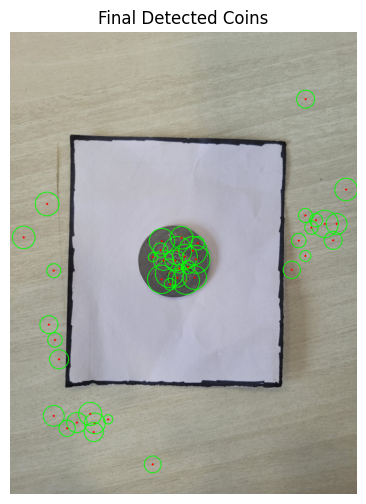

In [52]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show_image(title, img, cmap=None):
    """ Helper function to display an image in Google Colab. """
    plt.figure(figsize=(6, 6))
    if cmap:
        plt.imshow(img, cmap=cmap)  # For grayscale images
    else:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for proper display
    plt.title(title)
    plt.axis("off")
    plt.show()

def detect_paper_and_coins(image_path):
    # Read the image
    img = cv2.imread(image_path)

    if img is None:
        print("Error: Unable to read the image. Check the file path.")
        return

    show_image("Original Image", img)  # Show original image

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    show_image("Grayscale Image", gray, cmap="gray")  # Show grayscale image

    # Apply Gaussian Blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    show_image("Blurred Image", blurred, cmap="gray")

    # Detect edges using Canny
    edges = cv2.Canny(blurred, 50, 150)
    show_image("Edge Detection (Canny)", edges, cmap="gray")

    # Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if not contours:
        print("No contours detected.")
        return

    # Identify the largest contour (assuming it's the paper)
    paper_contour = max(contours, key=cv2.contourArea)

    # Approximate the contour to get four corners of the paper
    epsilon = 0.02 * cv2.arcLength(paper_contour, True)
    approx_corners = cv2.approxPolyDP(paper_contour, epsilon, True)

    if len(approx_corners) != 4:
        print("Could not detect paper properly.")
        return

    # Sort the corners to identify the bottom-left corner as the origin
    approx_corners = sorted(approx_corners, key=lambda x: (x[0][1], x[0][0]))  # Sort by y, then x
    origin = tuple(approx_corners[0][0])  # Bottom-left corner as origin

    # Draw the detected paper boundary and origin
    paper_img = img.copy()
    cv2.drawContours(paper_img, [paper_contour], -1, (255, 0, 0), 2)
    cv2.circle(paper_img, origin, 5, (0, 0, 255), -1)
    show_image("Detected Paper and Origin", paper_img)

    # Detect circular objects (coins)
    circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp=1.2, minDist=30,
                               param1=50, param2=30, minRadius=10, maxRadius=50)

    final_img = img.copy()  # Copy original image for final visualization

    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i, (x, y, r) in enumerate(circles[0, :]):
            # Compute distance from origin
            distance = np.sqrt((x - origin[0]) ** 2 + (y - origin[1]) ** 2)
            print(f"Coin {i+1}: Center=({x}, {y}), Distance from Origin={distance:.2f} pixels")

            # Draw circles and centers
            cv2.circle(final_img, (x, y), r, (0, 255, 0), 2)
            cv2.circle(final_img, (x, y), 2, (0, 0, 255), 3)

    show_image("Final Detected Coins", final_img)  # Show final image with detected coins

# User provides an image file
image_path = input("Enter image path: ")  # Upload image in Colab first
detect_paper_and_coins(image_path)


Enter image path: img10.jpeg


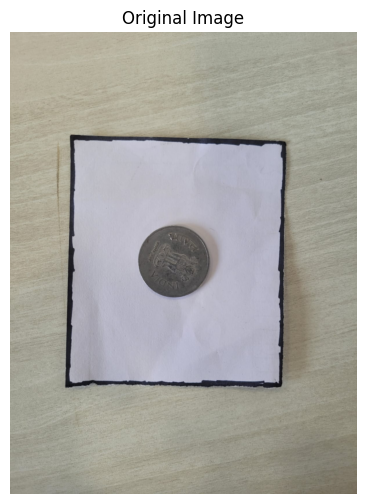

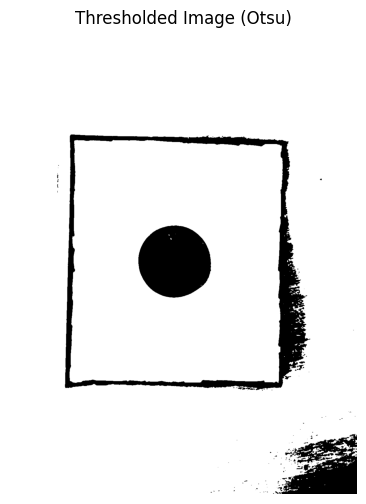

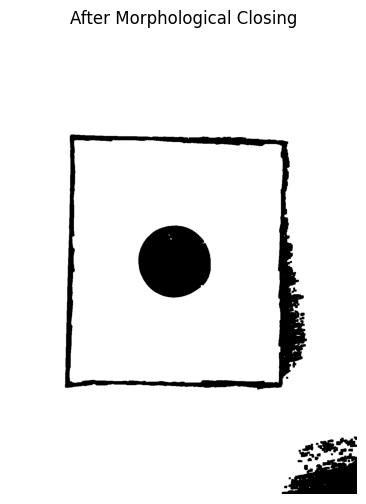

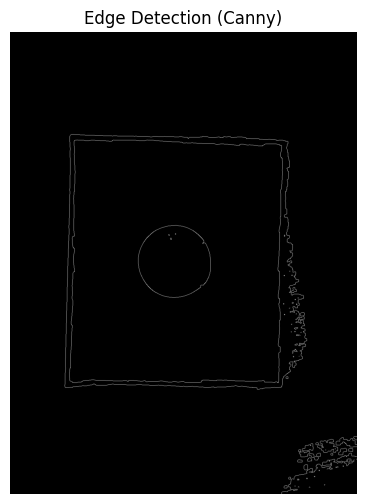

approx_corners length: 4
approx_corners data: [array([[223, 375]], dtype=int32), array([[939, 393]], dtype=int32), array([[ 207, 1208]], dtype=int32), array([[ 928, 1214]], dtype=int32)]


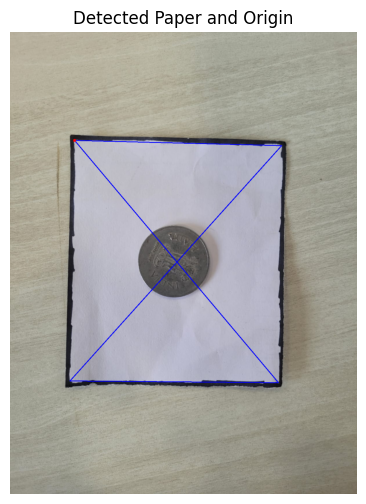

Coin Center: (578, 795), Distance from Origin: 549.93 pixels


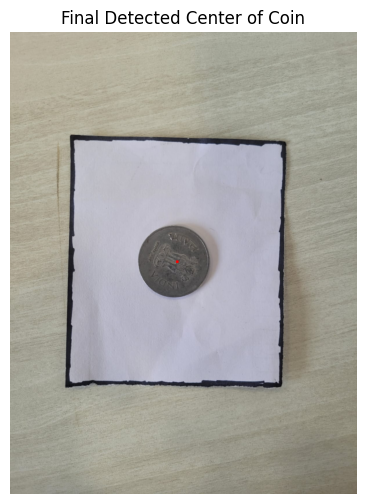

In [53]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show_image(title, img, cmap=None):
    """Helper function to display images."""
    plt.figure(figsize=(6, 6))
    if cmap:
        plt.imshow(img, cmap=cmap)
    else:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis("off")
    plt.show()

def detect_paper_and_coins(image_path):
    # Read the image
    img = cv2.imread(image_path)
    if img is None:
        print("Error: Unable to read the image.")
        return

    show_image("Original Image", img)

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Apply Otsu's thresholding (better than adaptive for uniform objects)
    _, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    show_image("Thresholded Image (Otsu)", thresh, cmap="gray")

    # Perform morphological closing to fill small gaps
    #kernel = np.ones((5, 5), np.uint8)
    #closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
    #show_image("After Morphological Closing", closed, cmap="gray")
    kernel = np.ones((7, 7), np.uint8)  # Use a larger kernel
    closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
    show_image("After Morphological Closing", closed, cmap="gray")


    # Detect edges using Canny
    #edges = cv2.Canny(closed, 50, 150)
    #show_image("Edge Detection (Canny)", edges, cmap="gray")
    edges = cv2.Canny(closed, 100, 200)  # Increase thresholds
    show_image("Edge Detection (Canny)", edges, cmap="gray")


    # Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if not contours:
        print("No contours detected.")
        return

    # Identify the largest contour (assuming it's the paper)
    paper_contour = max(contours, key=cv2.contourArea)

    # Approximate contour to detect four corners
    epsilon = 0.02 * cv2.arcLength(paper_contour, True)
    approx_corners = cv2.approxPolyDP(paper_contour, epsilon, True)

    # If approximation fails, retry with convex hull
    if len(approx_corners) != 4:
        approx_corners = cv2.convexHull(paper_contour)

    # Ensure a valid quadrilateral is detected
    if len(approx_corners) != 4:
        print("Could not detect paper properly, even after convex hull.")
        return

    # Sort corners: Identify bottom-left corner as the origin
    approx_corners = sorted(approx_corners, key=lambda x: (x[0][1], x[0][0]))
    origin = tuple(approx_corners[0][0])

    print(f"approx_corners length: {len(approx_corners)}")
    print(f"approx_corners data: {approx_corners}")

    # Draw detected paper boundary and origin
    paper_img = img.copy()
    cv2.drawContours(paper_img, [np.array(approx_corners, dtype=np.int32)], -1, (255, 0, 0), 2)
    cv2.circle(paper_img, origin, 5, (0, 0, 255), -1)
    show_image("Detected Paper and Origin", paper_img)

    # Detect circular objects (coins)
    circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp=1.2, minDist=30,
                               param1=50, param2=30, minRadius=10, maxRadius=50)

    final_img = img.copy()
    if circles is not None:
        circles = np.uint16(np.around(circles))
        valid_coins = []

        for x, y, r in circles[0, :]:
            if cv2.pointPolygonTest(paper_contour, (x, y), False) >= 0:
                valid_coins.append((x, y, r))

        # Compute center of mass of all detected coins
        if valid_coins:
            x_vals, y_vals = zip(*[(x, y) for x, y, _ in valid_coins])
            cx, cy = int(np.mean(x_vals)), int(np.mean(y_vals))

            # Compute distance from origin
            distance = np.sqrt((cx - origin[0]) ** 2 + (cy - origin[1]) ** 2)
            print(f"Coin Center: ({cx}, {cy}), Distance from Origin: {distance:.2f} pixels")

            # Draw the detected center
            cv2.circle(final_img, (cx, cy), 5, (0, 0, 255), -1)

    show_image("Final Detected Center of Coin", final_img)

# Run detection
image_path = input("Enter image path: ")  # Upload image in Colab first
detect_paper_and_coins(image_path)
